## Correlated data in nature

We are given an array grains giving the width and length of samples of grain. We will confirm if width and length are correlated. To confirm this, we will make a scatter plot of width vs length and measure their Pearson correlation.

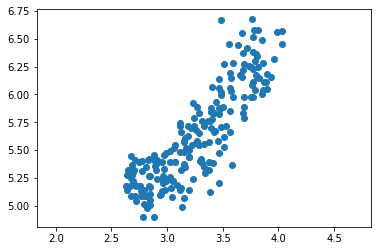

0.8604149377143466


In [1]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

grains = pd.read_csv("seeds-width-vs-length.csv",header=None)

# Assign the 0th column of grains: width
width = grains.iloc[:,0].values

# Assign the 1st column of grains: length
length = grains.iloc[:,1].values

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)


## Decorrelating the grain measurements with PCA

We observed in the previous exercise that the width and length measurements of the grain are correlated. Now, we'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

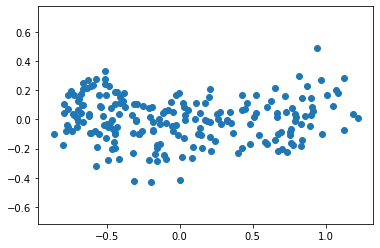

2.5478751053409354e-17


In [2]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

##The first principal component

The first principal component of the data is the direction in which the data varies the most. In this exercise, we'll use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.


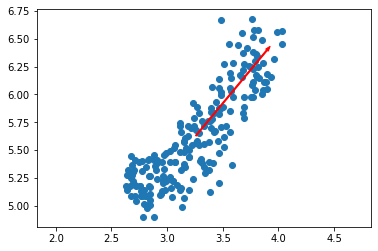

In [3]:
# Make a scatter plot of the untransformed points
plt.scatter(width, length)

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

# Variance of the PCA features

The fish dataset is 6-dimensional. But what is its intrinsic dimension? We'll make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. We'll need to standardize the features first.

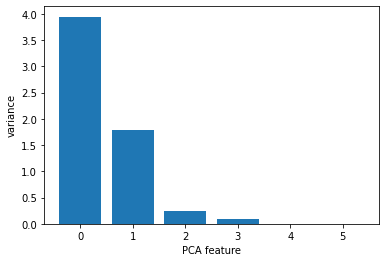

In [4]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

fish = pd.read_csv("fish.csv",header=None)
samples = fish.iloc[:,1:].values
species = fish.iloc[:,0]

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


## Dimension reduction of the fish measurements

In the previous exercise, we saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now we'll use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

We need to scale the fish measurements.

In [5]:

# Import PCA
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

scaled_samples = preprocessing.scale(samples)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)
